# Analysing a time series

To examine how the genetic diversity of the population changes over time, we need to make observations at multiple time points. 

* We construct a list (or a range) of observation times.  This is recorded in backwards time, so that observation time = 0 is the present or most recent generation in the population history. 
* We pass this to `get_coalescent` which launches a Markov chain simulation of coalescence times at each observation time point.
* When we run `get_diversity` it automatically calculates nucleotide diversity and haplotype homozygosity at each observation time point.
* We can use `plot_observations` to view the time series data

Thus if we specify 100 observation times, this will require 100 simulations, which will take much longer (typically several minutes for a population size of several thousands) than a single observation (typically several seconds).  

`get_diversity` starts with the earliest observation and proceeds to the most recent generation. The effective recombination parameter $\phi$ is updated with each observation, so that more recent generations are likely to have a more accurate estimate of $\phi$ than earlier observations.

In [ ]:
!pip install coalestr
from coalestr import cs

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0             100.0     100.0        14.4      5.0
        1             100.0     100.0        14.4      5.0
        2             100.0     100.0        14.5      5.0
        3             100.0     100.0        14.5      5.0
        4             100.0     100.0        14.6      5.0
        5             100.0     100.0        14.6      5.0
        6             100.0     100.0        14.7      5.0
        7             100.0     100.0        14.8      5.0
        8             100.0     100.0        14.8      5.0
        9             100.0     100.0        14.9      5.0
       10             100.0     100.0        15.0      5.0
       11             100.0     100.0        15.2      5.0
       12             100.0     100.0        15.3      5.0
       13             100.0     100.0        15.4      5.0
       14             100.0     100.0        15.6     

      149             100.0     100.0        14.0      5.0


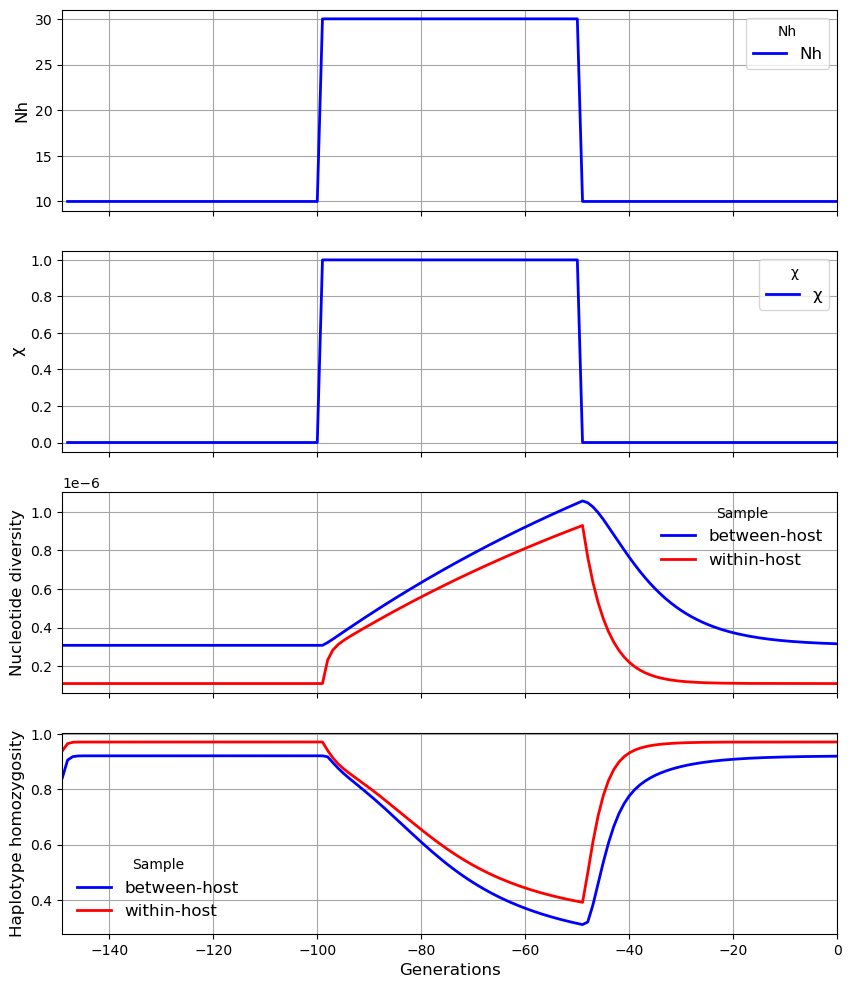

In [4]:
my_history = [[300, 10, 5, 0, 1],
              [50, 30, 5, 1, 1],
              [50, 10, 5, 0, 1]]

my_population = cs.Population(my_history)

# We specify observation times as a list or a range
my_observations = range(0, 150, 1)

# We pass the observation times to get_coalescent
my_population.get_coalescent(observe = my_observations)

In [5]:
# get_diversity automatically analyses each observation time
my_population.get_diversity()

Observation time.  Nucleotide diversity     Haplotype homozygosity
                      beho       wiho           beho       wiho
      149           3.08e-07   1.10e-07       8.42e-01   9.39e-01
      148           3.08e-07   1.10e-07       9.05e-01   9.65e-01
      147           3.08e-07   1.10e-07       9.18e-01   9.69e-01
      146           3.08e-07   1.10e-07       9.20e-01   9.70e-01
      145           3.08e-07   1.10e-07       9.21e-01   9.71e-01
      144           3.08e-07   1.10e-07       9.21e-01   9.71e-01
      143           3.08e-07   1.10e-07       9.21e-01   9.71e-01
      142           3.08e-07   1.10e-07       9.21e-01   9.71e-01
      141           3.08e-07   1.10e-07       9.21e-01   9.71e-01
      140           3.08e-07   1.10e-07       9.21e-01   9.71e-01
      139           3.08e-07   1.10e-07       9.21e-01   9.71e-01
      138           3.08e-07   1.10e-07       9.21e-01   9.71e-01
      137           3.08e-07   1.10e-07       9.21e-01   9.71e-01
      136  

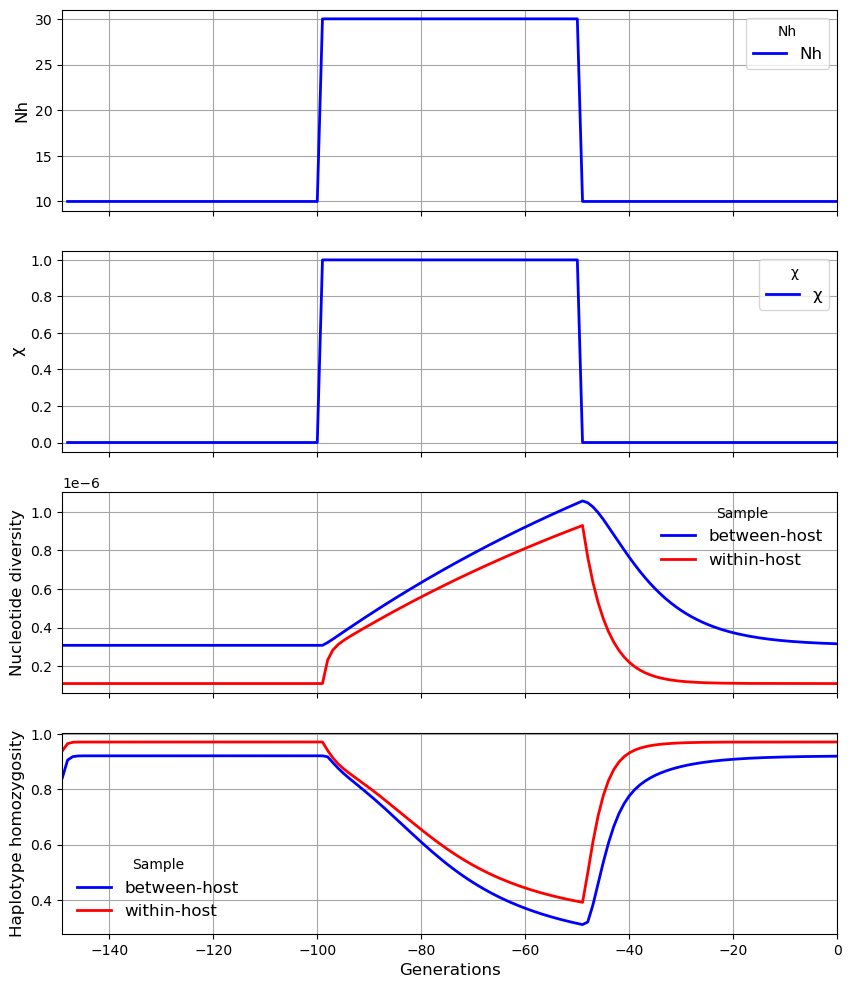

In [6]:
# We can use plot_observations to view the time series data
my_population.plot_observations(metrics = ("N", "X", "snp_het", "hap_hom"))